This is part 3 in a series on charting year-on-year variance. I previously explained how to make a year-on-year chart with variance in Excel.

This is a similar tutorial but in Python. This notebook is also in a [github repo here](https://github.com/ryanward-io/year-on-year-variance).

### Starting with importing libraries and the data

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

f = 'https://raw.githubusercontent.com/ryanward-io/year-on-year-variance/main/IDCJAC0001_086232_Data.csv'
rainfall = pd.read_csv(f)
rainfall = rainfall.iloc[-6:].drop(['Product code', 'Station Number', 'Annual'], axis=1).set_index('Year').T.copy()
rainfall

Year,2015,2016,2017,2018,2019,2020
Jan,56.8,53.4,33.2,73.6,12.6,129.4
Feb,41.4,9.2,47.0,1.2,20.3,75.8
Mar,24.4,38.2,29.2,24.6,14.6,78.2
Apr,NaN,49.7,142.7,19.0,11.6,145.6
May,42.8,60.2,29.6,72.2,63.5,82.8
Jun,NaN,71.3,21.4,47.2,57.5,30.8
Jul,65.0,68.6,35.6,22.0,52.8,32.4
Aug,41.0,69.4,NaN,49.4,64.3,68.8
Sep,33.2,104.6,46.7,19.0,51.4,26.8
Oct,11.8,70.2,43.4,24.9,27.7,NaN


### Make 2015-19 average, min and max columns

In [3]:
yr_2015_2019_cols = [2015, 2016, 2017, 2018, 2019]
rainfall['2015-2019 avg'] = rainfall.loc[:, yr_2015_2019_cols].mean(axis=1)
rainfall['2015-2019 max'] = rainfall.loc[:, yr_2015_2019_cols].max(axis=1)
rainfall['2015-2019 min'] = rainfall.loc[:, yr_2015_2019_cols].min(axis=1)
rainfall_yoy = rainfall.drop(yr_2015_2019_cols, axis=1)
rainfall_yoy

Year,2020,2015-2019 avg,2015-2019 max,2015-2019 min
Jan,129.4,45.920,73.6,12.6
Feb,75.8,23.820,47.0,1.2
Mar,78.2,26.200,38.2,14.6
Apr,145.6,55.750,142.7,11.6
May,82.8,53.660,72.2,29.6
Jun,30.8,49.350,71.3,21.4
Jul,32.4,48.800,68.6,22.0
Aug,68.8,56.025,69.4,41.0
Sep,26.8,50.980,104.6,19.0
Oct,NaN,35.600,70.2,11.8


### Let’s check what it looks like out of the box

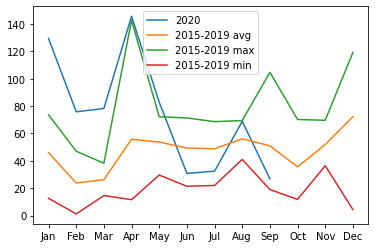

In [7]:
plt.plot(rainfall_yoy)
plt.legend(rainfall_yoy.columns)
plt.show()

### Plotting the nicer looking chart

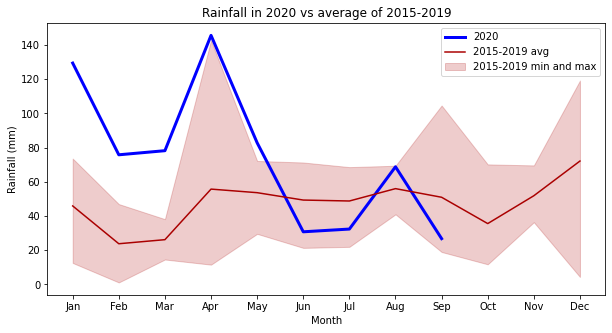

In [9]:
# data
x = rainfall_yoy.index.values
y_2020 = rainfall_yoy[2020].values
y_2015_2019_avg = rainfall_yoy['2015-2019 avg'].values
y_2015_2019_max = rainfall_yoy['2015-2019 max'].values
y_2015_2019_min = rainfall_yoy['2015-2019 min'].values

# initialise the plot and plot the three charts
fig, ax = plt.subplots(figsize=[10,5])
ax.plot(x, y_2020, '-', color='#0000ff', linewidth=3)
ax.plot(x, y_2015_2019_avg, '-', color='#aa0000')
ax.fill_between(x, y_2015_2019_min, y_2015_2019_max, color='#aa0000', alpha=0.2)

# add out legend and labels
ax.legend(['2020', '2015-2019 avg', '2015-2019 min and max'])
ax.set_xlabel('Month')
ax.set_ylabel('Rainfall (mm)')
ax.set_title('Rainfall in 2020 vs average of 2015-2019')

plt.show()

Enjoy!